Import all the code. If you get import errors, review the installation proceedure. Make sure you are using the correct kernel. You will need to explicitly set up a kernel for the environment you've created. 

In [1]:
from smokedetectoroptimization.optimizer import (optimize, evaluate_optimization,
                                                 optimization_logger, evaluate_locations)
from smokedetectoroptimization.smoke_source import SmokeSource, smoke_logger
from smokedetectoroptimization.constants import (ALARM_THRESHOLD, FALSE_ALARM_THRESHOLD, 
                                                 SMOOTH_PLOTS, SINGLE_OBJECTIVE_FUNCTIONS_TTA,
                                                 SINGLE_OBJECTIVE_FUNCTIONS_MC)

In [2]:
import sys
# This is a hack, but it lets us import something from the folder above.
# I will address it at some point soon.
sys.path.append("..")
from constants import (SMOKE_FOLDERS, SMOKE_FOLDERS_LONG,
                       FALSE_ALARM_FOLDERS, FALSE_ALARM_FOLDERS_LONG,
                       NASA_DETECTORS, SOURCE_LOCATIONS)


The goal is to set the level of detail we get printed out. The smoke logger appears to be broken since it should display which directory it's loading from.

In [3]:
import logging
optimization_logger.setLevel(logging.ERROR)
smoke_logger.setLevel(logging.DEBUG)

This is simply a visualization style thing. It controls whether plots are interpolated, which is prettier, or whether they are dots, which is arguably more informative. Note, for this to have any effect, SMOOTH_PLOTS must be already imported

In [4]:
SMOOTH_PLOTS = True

Parameterization can be "xy", "yz", "xz", "xyz", or "phi_theta"  
Function type can be "multiobjective_competing", "multiobjective_counting", or "worst_case", which is the one we are used to. "fastest" and "second are also supported, but I would not recommend using them.  
Interplolation method can be "nearest", which takes the nearest value, or "linear" or "cubic" The later two seem to take much longer.  

Loading C:\Users\russe\dev\SmokeDetectorOptimization\data\laptop_1000_steps


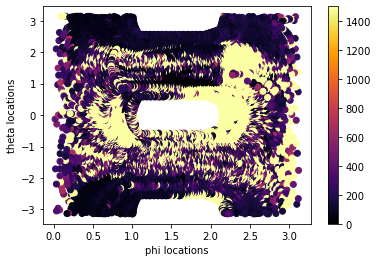

Loading C:\Users\russe\dev\SmokeDetectorOptimization\data\wall_computer_1000_steps


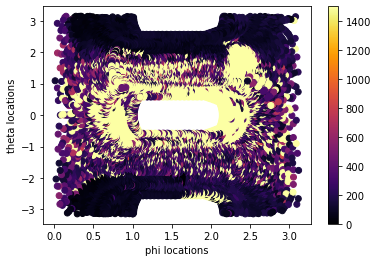

In [5]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = True

sources = []
# This notation just takes the first two folders
# This makes it much faster to evaluate the optimization
for data_dir in SMOKE_FOLDERS_LONG:
    # create a smoke source and then get it's time to alarm with a given parameterization
    print(f"Loading {data_dir}")
    sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))

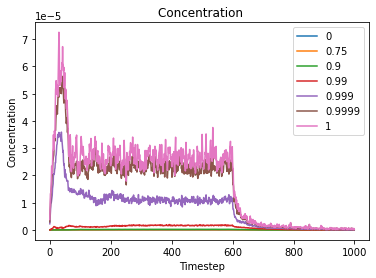

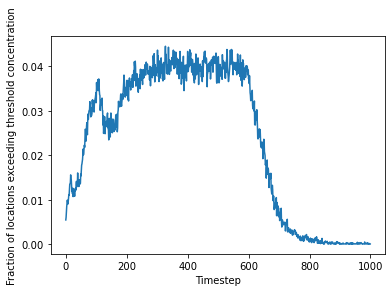

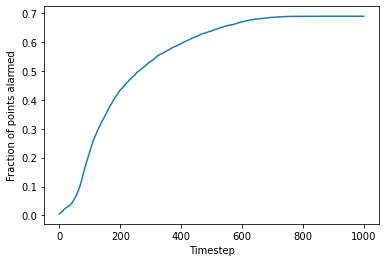

In [6]:
source = sources[0]
source.visualize_summary_statistics(quantiles=(0, 0.75, 0.9, 0.99, 0.999, 0.9999, 1))

Showing a 3D plot of time to alarm with final locations in green


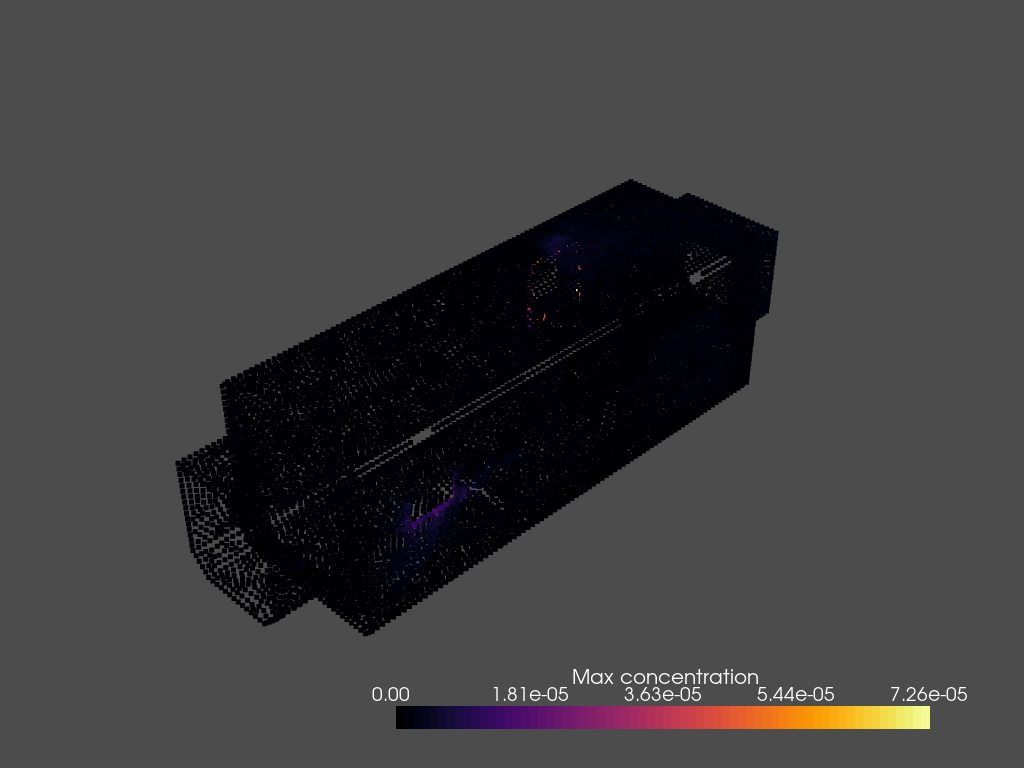

In [7]:
source.visualize_3D(which_metric="max_concentration")

divide by zero encountered in log10
Showing a 3D plot of time to alarm with final locations in green


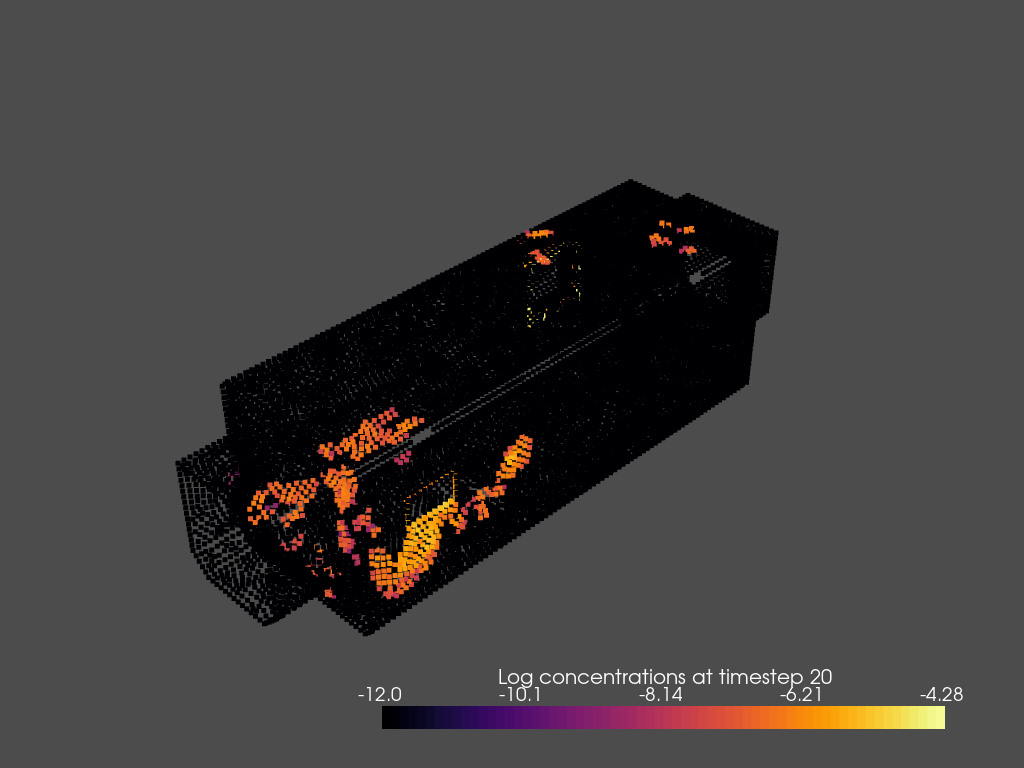

In [8]:
source.visualize_3D(concentation_timestep=20, log_concentrations=True)

Showing a 3D plot of time to alarm with final locations in green


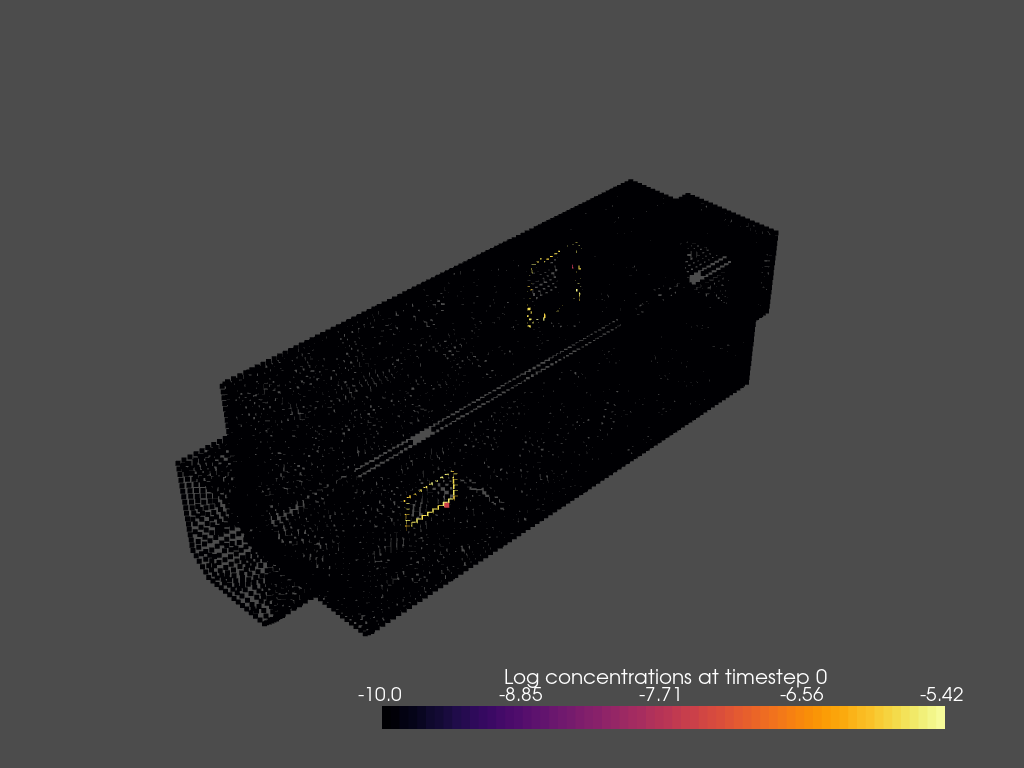

Showing a 3D plot of time to alarm with final locations in green


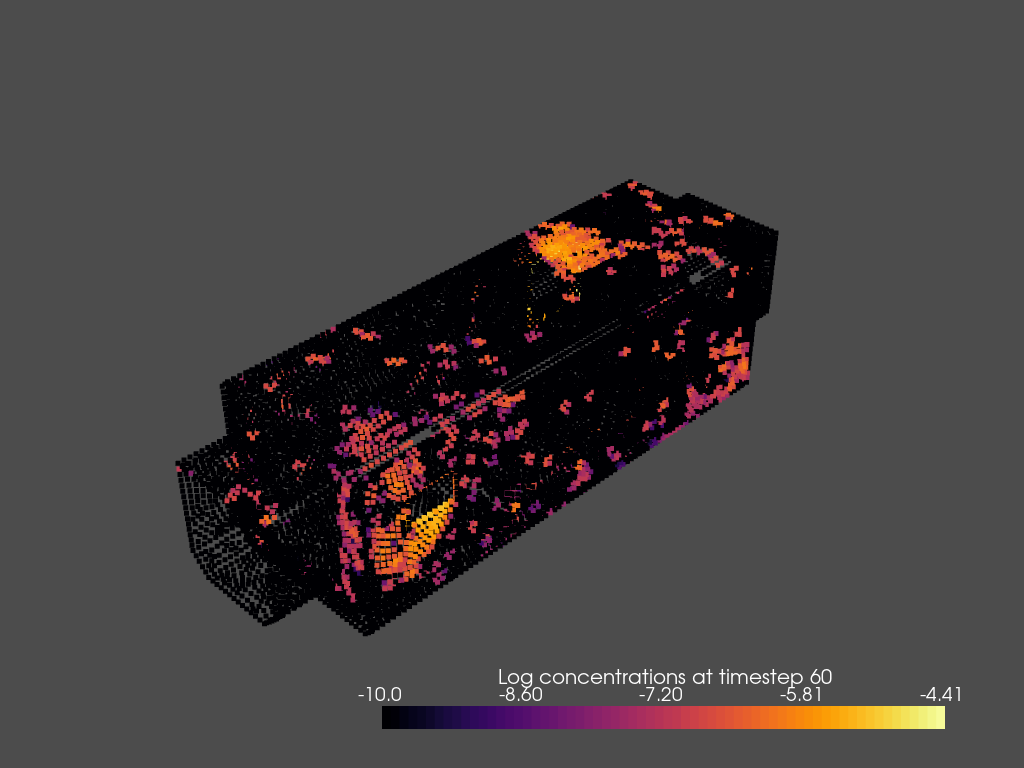

Showing a 3D plot of time to alarm with final locations in green


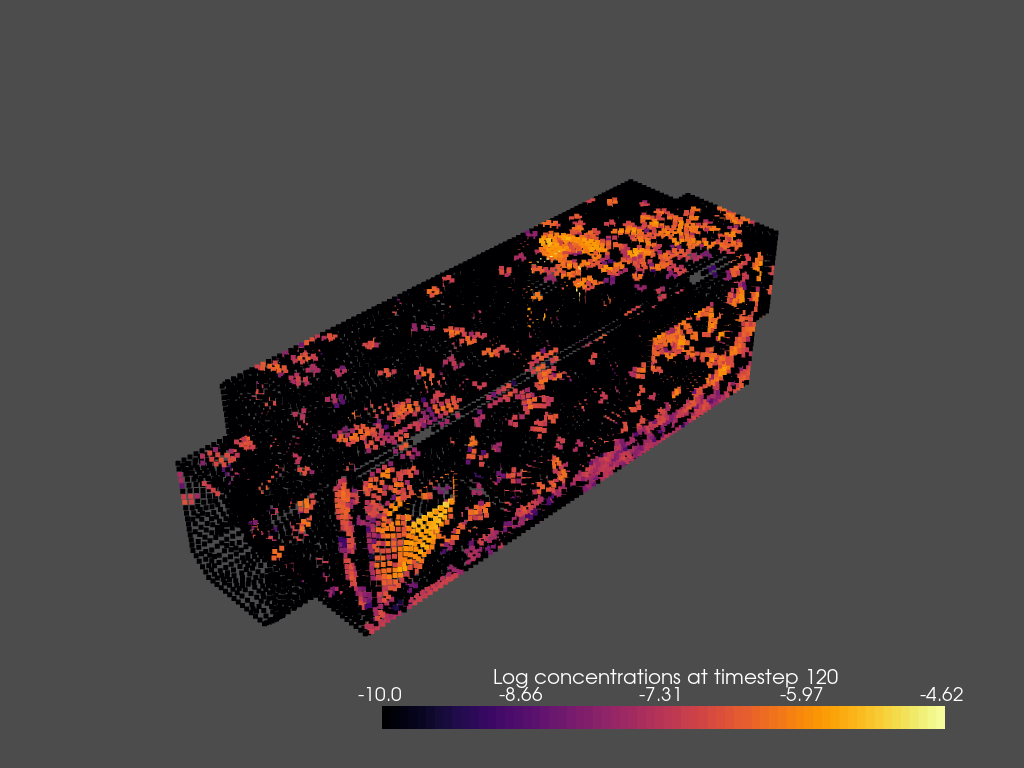

Showing a 3D plot of time to alarm with final locations in green


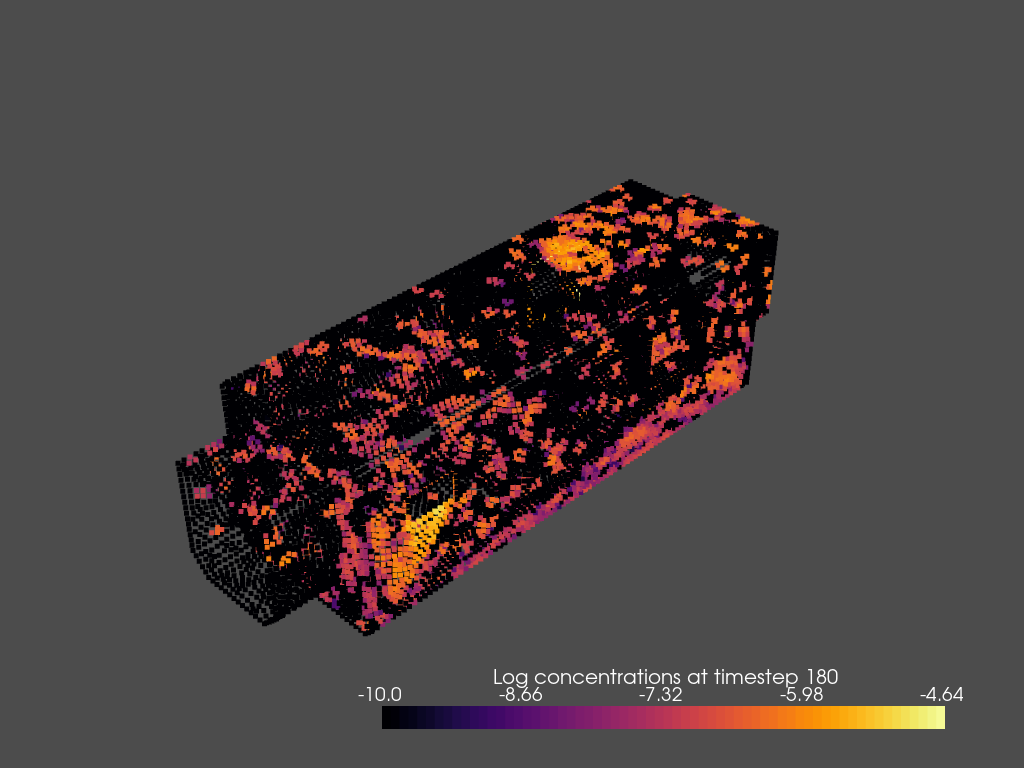

Showing a 3D plot of time to alarm with final locations in green


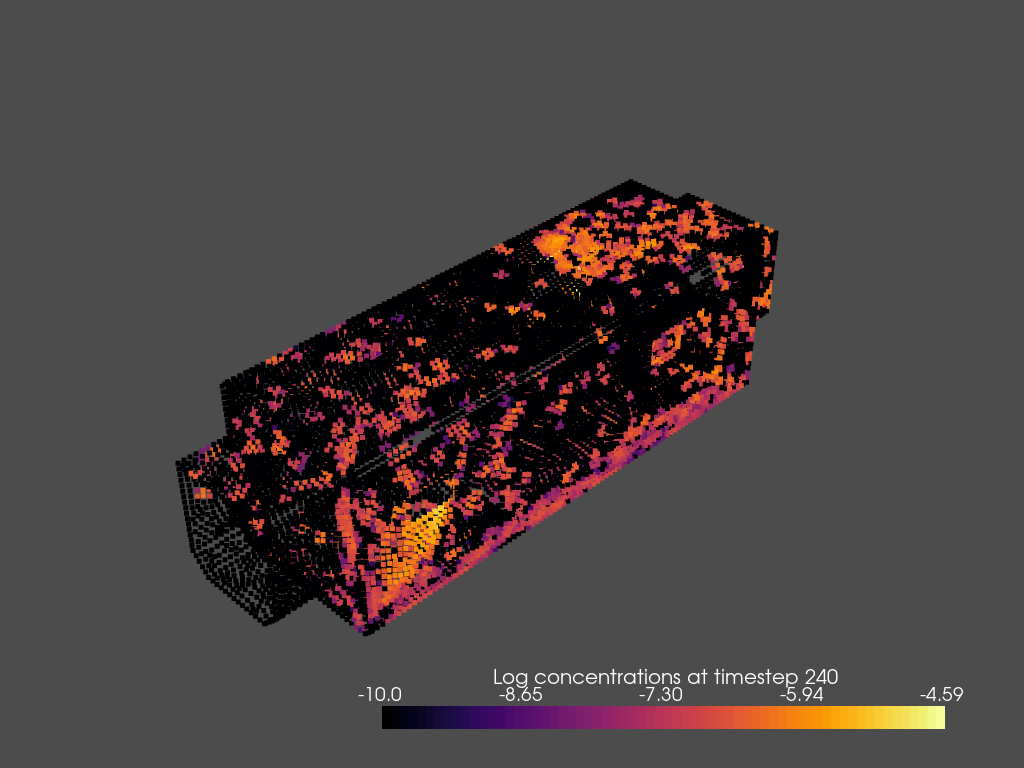

Showing a 3D plot of time to alarm with final locations in green


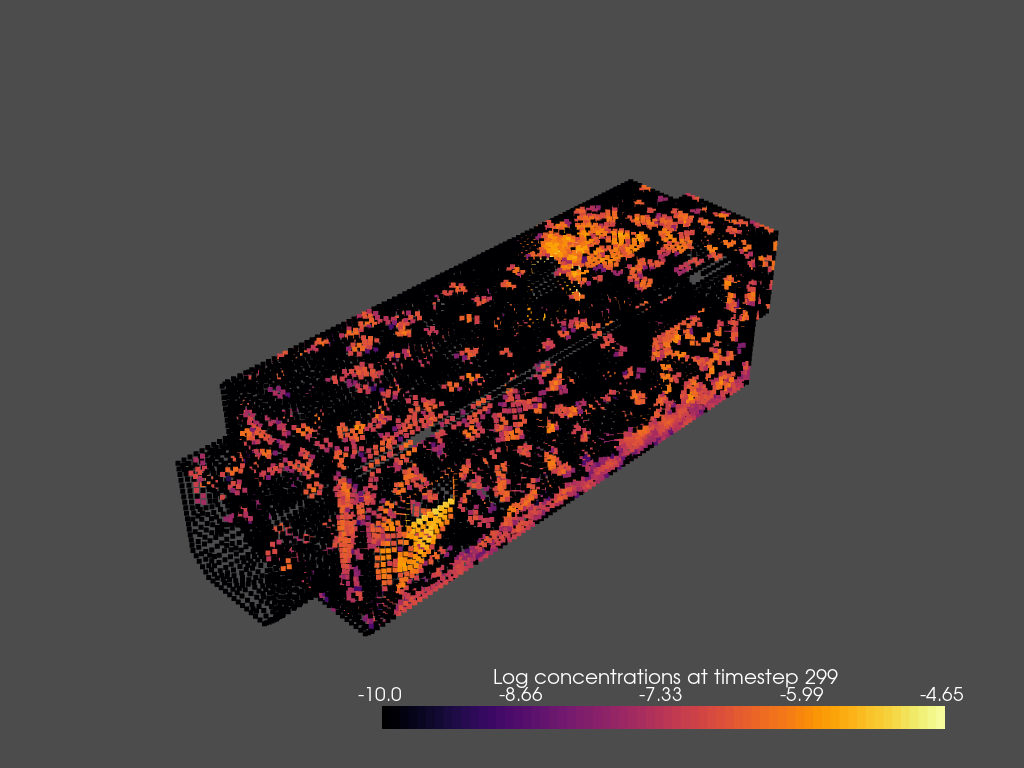

In [9]:
TIMESTEPS = [0, 60, 120, 180, 240, 299]
for timestep in TIMESTEPS:
    source.visualize_3D(concentation_timestep=timestep, log_concentrations=True, log_lower_bound=-10)

Here we explore the impact of different interpolation strategies.

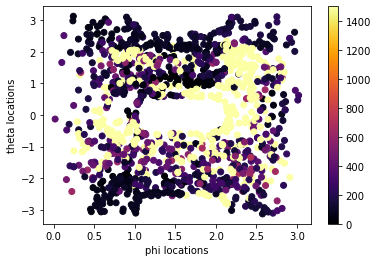

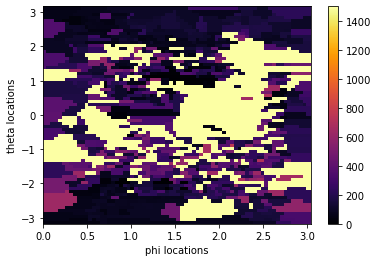

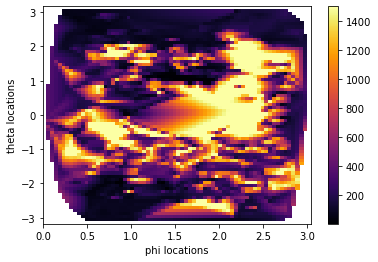

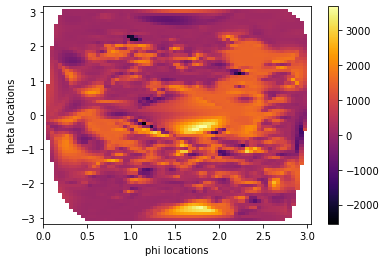

In [10]:
# Visualize the first source with differnt types of interpolation
POINTS_FRACTION = 0.1
source = sources[0]
interpolation_methods = [None, "nearest", "linear", "cubic"]
for interpolation_method in interpolation_methods:
    source.visualize_metric(points_fraction=POINTS_FRACTION, interpolation=interpolation_method)

Showing a 3D plot of time to alarm with final locations in green


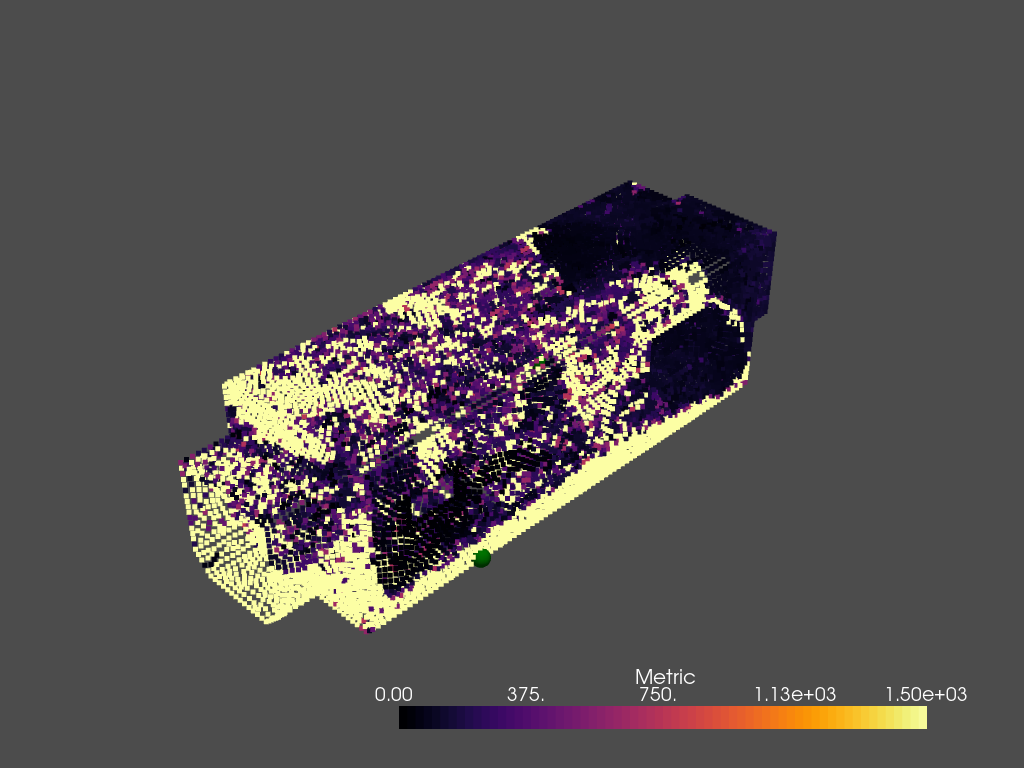

In [11]:
import pyvista as pv

PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
PLOTTER = pv.Plotter # Could also be pv.PlotterITK for interactive, but slightly glitchy, interactions
# This should be approximately the location of the sources
VIS = True

sources[0].visualize_3D(highlight_locations=NASA_DETECTORS, plotter=PLOTTER)

In [12]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
PLOTTER = pv.PlotterITK # Could also be pv.PlotterITK for interactive, but slightly glitchy, interactions
# This should be approximately the location of the sources
VIS = True

sources[0].visualize_3D(highlight_locations=SOURCE_LOCATIONS, plotter=PLOTTER)

Showing a 3D plot of time to alarm with final locations in green


Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

In [13]:
# check how good the NASA locations are
res = evaluate_locations(NASA_DETECTORS, sources,
                        function_type=FUNCTION_TYPE,
                        interpolation_method=INTERPOLATION_METHOD,
                        vis=VIS)
print(f"The value of location {NASA_DETECTORS} is {res}")

The value of location (2.11500001, -3.0, -2.84649992, 6.42500019, 0.0, -2.84649992) is 1500.0


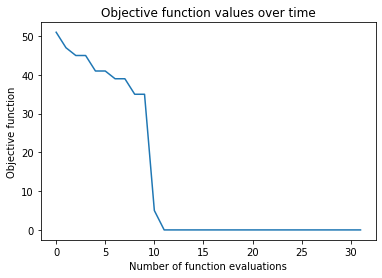

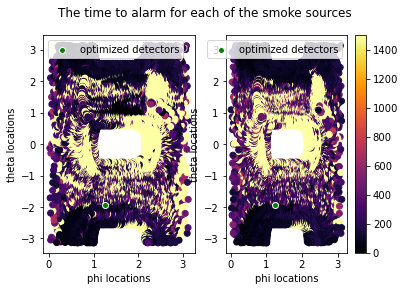

Showing a 3D plot of time to alarm with final locations in green


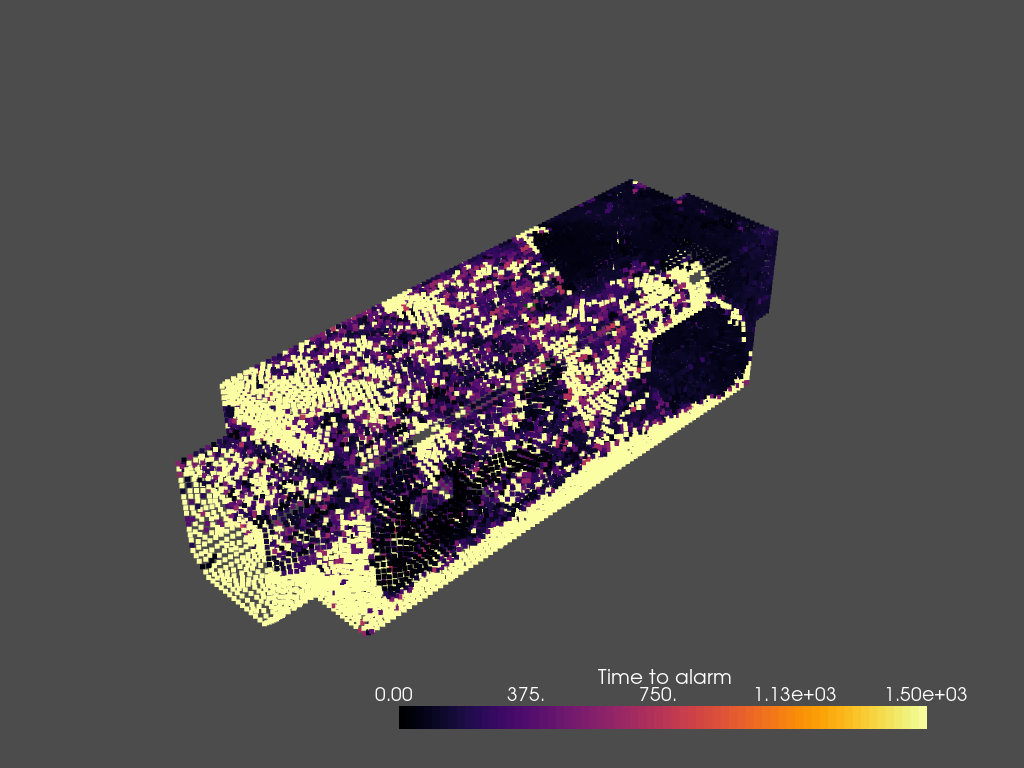

Showing a 3D plot of time to alarm with final locations in green


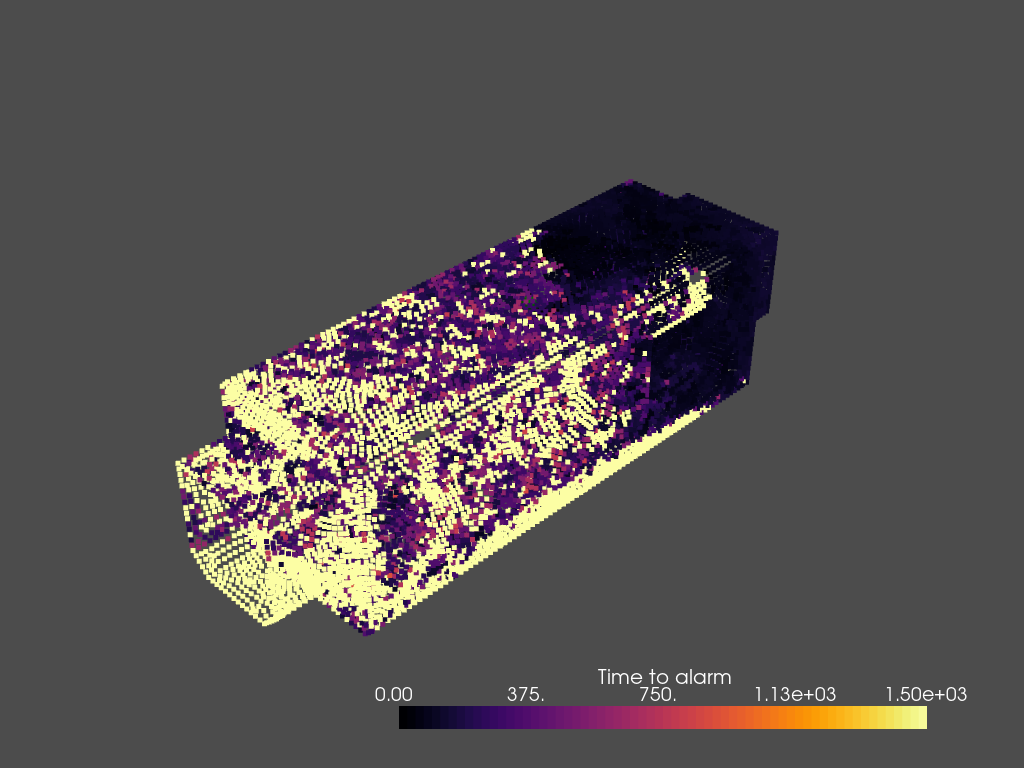

Begining to visualize slices. May take a while


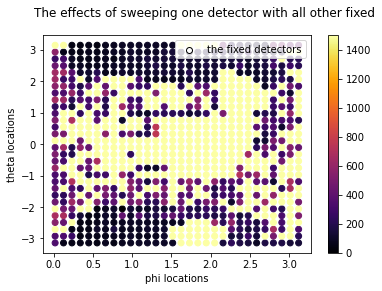

Parameterized, phi location : p, theta location : a
3D, X : X, Y : Y, Z : Z
------------
The final value was 0.0


In [14]:
res = optimize(sources,
               num_detectors=1,
               function_type="worst_case_TTA",
               bounds=None,
               bad_sources=None,
               vis=True,
               interpolation_method="nearest")

In [15]:
evaluate_locations(res["x"],
                   sources,
                   function_type="worst_case_TTA",
                   bad_sources=None,
                   vis=True,
                   interpolation_method="nearest",
                   parameterized=True)

0.0

In [16]:
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = False

bad_sources = []
# This notation just takes the first two folders
# This makes it much faster to evaluate the optimization
for data_dir in FALSE_ALARM_FOLDERS:
    # create a smoke source and then get it's time to alarm with a given parameterization
    print(f"Loading {data_dir}")
    bad_sources.append(SmokeSource(data_dir,
                               parameterization=PARAMETERIZATION,
                               vis=VIS,
                               alarm_threshold=ALARM_THRESHOLD))

Loading C:\Users\russe\dev\SmokeDetectorOptimization\data\bike_full3D


Showing a 3D plot of time to alarm with final locations in green


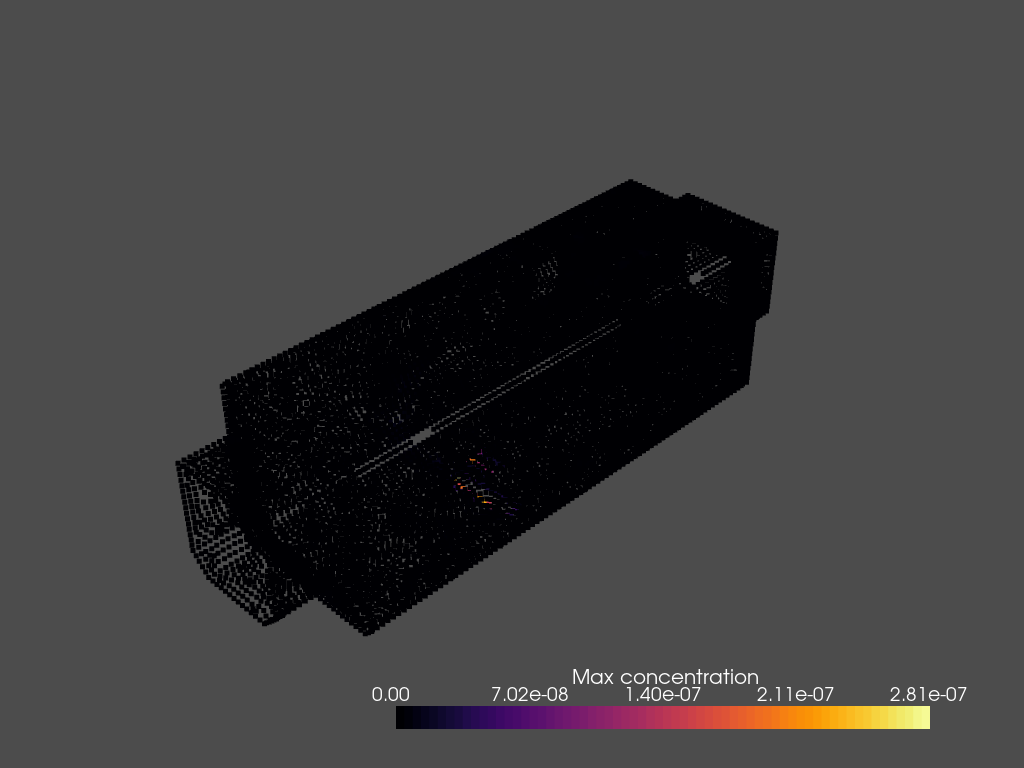

In [17]:
bad_sources[0].visualize_3D(which_metric="max_concentration", plotter=pv.Plotter)

100%|███████████████████████████████████████████████████████████| 10/10 [03:07<00:00, 18.79s/it]


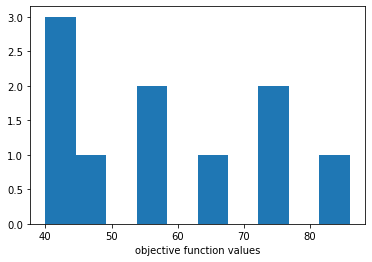

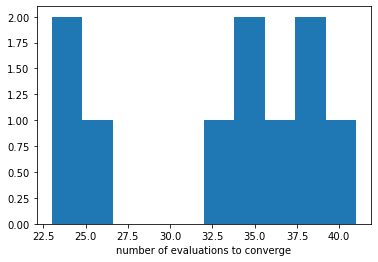

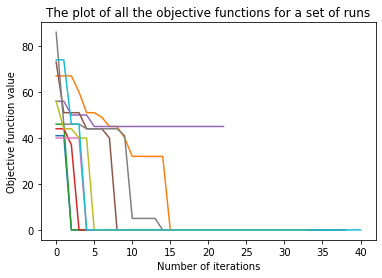

In [18]:
import numpy as np
res = evaluate_optimization(sources,
                            num_iterations=10,
                            visualize_summary=True)

In [19]:
print(res.keys())
for k, v in res.items():
    np.save(k + ".npy", v)
np.save("keys.npy", list(res.keys()))

dict_keys(['iter_vals', 'final_vals', 'final_locs', 'num_iters', 'final_locs_3D'])


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [20]:
keys = np.load("keys.npy")
res = {}
for key in keys:
    res[key] = np.load(key + ".npy", allow_pickle=True)
print(res)

{'iter_vals': array([list([41.0, 41.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([67.0, 67.0, 67.0, 60.0, 51.0, 51.0, 49.0, 45.0, 45.0, 40.0, 32.0, 32.0, 32.0, 32.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([46.0, 46.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([44.0, 44.0, 37.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([56.0, 56.0, 50.0, 50.0, 50.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]),
       list([73.0, 51.0, 51.0, 51.0, 44.0, 44.0, 44.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 